In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('water.csv')

In [3]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
Unnamed: 0    61 non-null int64
location      61 non-null object
town          61 non-null object
mortality     61 non-null int64
hardness      61 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [5]:
data.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


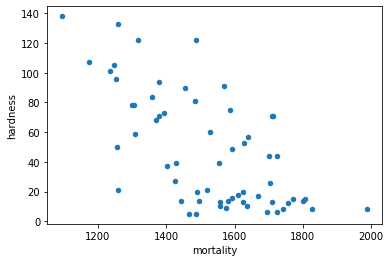

In [6]:
data.plot(kind = 'scatter',
          x = 'mortality',
          y = 'hardness'
         )

In [7]:
# Коэффицент корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
# Коэффиценткорреляции Спирмена 
data[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = data[['hardness']]
y = data['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape

(42, 1)

In [13]:
y_train.shape

(42,)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.coef_

array([-3.13167087])

In [17]:
model.intercept_

1668.9722977277095

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [19]:
model.score(X_test, y_test) 

0.5046490611017092

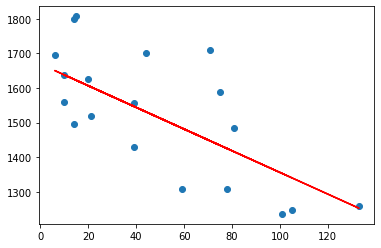

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

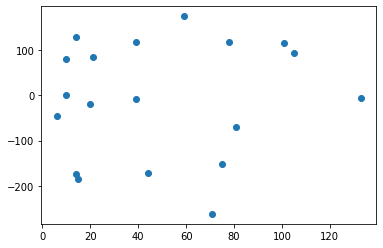

In [21]:
plt.scatter(X_test, y_pred - y_test)

# График остатков не закономерен, коэффицент детерминации равен 0.5. Чем меньше жесткость воды, тем выше смертность 

In [22]:
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [23]:
south = data[data.location == 'South']
north = data[data.location == 'North']

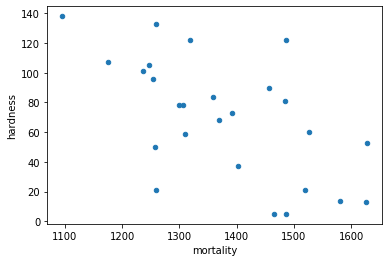

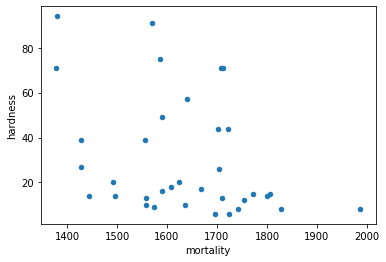

In [24]:
south.plot(kind = 'scatter',
          x = 'mortality',
          y = 'hardness'
         )
north.plot(kind = 'scatter',
          x = 'mortality',
          y = 'hardness'
         )

# В южных городах связь есть, но не сильная, а в северных - почти нет

In [25]:
# Коэффицент корреляции Пирсона для южных городов
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [26]:
# Коэффицент корреляции Пирсона для северных городов
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [27]:
# Коэффицент корреляции Спирмена для южных городов
south[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [28]:
# Коэффицент корреляции Спирмена для северных городов
north[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


# Модель линейной регрессии для южных городов:

In [29]:
Xs = south[['hardness']]
ys = south['mortality']

In [30]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=42)

In [31]:
models = LinearRegression()
models.fit(Xs_train, ys_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
models.coef_

array([-3.51342921])

In [33]:
models.intercept_

1640.2204603423374

In [34]:
ys_pred = models.predict(Xs_test)
ys_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [35]:
models.score(Xs_test, ys_test) #отображать не буду, r < 0 ))

-2.5519223012352077

In [36]:
len(south)

26

# Модель линейной регрессии для северных городов:


In [37]:
Xn = north[['mortality']]
yn = north['hardness']

In [38]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30, random_state=42)

In [39]:
modeln = LinearRegression()
modeln.fit(Xn_train, yn_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
modeln.coef_

array([-0.09774218])

In [41]:
modeln.intercept_

191.72797679112006

In [42]:
yn_pred = modeln.predict(Xn_test)
yn_pred

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [43]:
modeln.score(Xn_test, yn_test) # r < 0 

-0.34863672627416675

In [44]:
len(north)

35